In [158]:
# Clear workspace
rm(list=ls())

In [159]:
# Garabage collect to help with memory issues
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3191989,170.5,5974031,319.1,5974031,319.1
Vcells,5541642,42.3,55529517,423.7,72214754,551.0


In [1]:
# install.packages("tidyverse") # sagemaker has
library(tidyverse)

# install.packages("cluster") # sagemaker has
library(cluster)

install.packages("tsfeatures") # sagemaker doesn't have
library(tsfeatures)

install.packages("mclust") # sagemaker doesn't have
library(mclust)

install.packages("Rcatch22") # sagemaker doesn't have
library(Rcatch22)

install.packages("tseries") # sagemaker doesn't have
library(tseries)

install.packages("factoextra") # sagemaker doesn't have
library(factoextra)

install.packages("forecast") # sagemaker doesn't have
library(forecast)

install.packages("dtwclust") # sagemaker doesn't have
library(dtwclust)

Warning message:
“‘timedatectl’ indicates the non-existent timezone name ‘n/a’”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'”
Warning message:
“package ‘dtwclust’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://

ERROR: Error in library(dtwclust): there is no package called ‘dtwclust’


# Read In and Subset Data

In [160]:
# Read in all files from the Data/Processed directory
england_fnames <- list.files("Data/Processed/Highways_England/", pattern="*.csv", full.names=TRUE)
england_df_list <- lapply(england_fnames, read_csv)

portland_fnames <- list.files("Data/Processed/Portland/", pattern="*.csv", full.names=TRUE)
portland_df_list <- lapply(portland_fnames, read_csv)

utah_fnames <- list.files("Data/Processed/Utah/", pattern="*.csv", full.names=TRUE)
utah_df_list <- lapply(utah_fnames, read_csv)

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

In [161]:
# Ensure that the rows in each data frame are in proper chronological order 
england_df_list <- lapply(england_df_list, function(x) x %>% arrange(timestamp))
portland_df_list <- lapply(portland_df_list, function(x) x %>% arrange(timestamp))
utah_df_list <- lapply(utah_df_list, function(x) x %>% arrange(timestamp))    

In [162]:
# Create one list of all data frames
total_df_list <- append(append(england_df_list, portland_df_list), utah_df_list)

In [163]:
# Randomly create a list of starting points from which we we sample each data frame

# Set the seed
set.seed(54321)

# Sample without replacement as to ensure the starting time for each time series is different
starting_points <- sample(1:((96*365)-(96*12*7)), 
                          length(total_df_list), 
                          replace=FALSE)

# Create the ending points by adding on 12 weeks to the starting points
ending_points <- starting_points + (96*7*12) - 1

In [164]:
# For each df in our list, create a row number column called 'rn' - this will allow us to find the starting point
# for each sample using the above starting_points array
total_df_list <- lapply(total_df_list, function(x) x %>% mutate(rn = row_number()))

In [165]:
# Sample each df in the list according to its corresponding starting and ending point - this creates 12-week
# long samples of each data frame which will be used for modeling and testing
total_df_list_samples <- lapply(1:length(total_df_list), 
                                function(x) total_df_list[[x]] %>% 
                                    filter(rn >= starting_points[x]) %>%
                                    filter(rn <= ending_points[x]))

In [166]:
# Add a new column to each data frame to denote whether each row should be part of the training set, validation set
# or test set - the first 8 weeks are designated as train, the next 2 as val, and the final 2 as test. It may be 
# the case that train and val get used for training, depending on the modeling task
total_df_list_samples <- lapply(total_df_list_samples, 
                                function(x) x %>% mutate(rn = row_number()) %>%
                                    mutate(train_val_test = ifelse(rn <= (96*7*8), 
                                                                   "train", 
                                                                   ifelse(rn <= (96*7*10), 
                                                                          "val", 
                                                                          "test")))
                                
                               )

In [167]:
# Create a list of data frames which only have the training and validation rows of each df
train_val_samples <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test != "test"))

In [168]:
# Create a list of data frames which only have the training rows of each df
train_samples <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test == "train"))

In [169]:
# Create a list of data frames which only have the test rows of each df
test_samples <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test == "test"))

In [170]:
# Get the target field (total_volume) from the dfs in the above lists and create msts objects instead of dfs
train_val_samples_ts <- lapply(train_val_samples, 
                               function(x) msts(x$total_volume, seasonal.periods=c(24*4, 24*4*7)))

In [171]:
# Get the target field (total_volume) from the dfs in the above lists and create msts objects instead of dfs
train_samples_ts <- lapply(train_samples, 
                           function(x) msts(x$total_volume, seasonal.periods=c(24*4, 24*4*7)))

In [172]:
# Get the target field (total_volume) from the dfs in the above lists and create msts objects instead of dfs
test_samples_ts <- lapply(test_samples,
                          function(x) msts(x$total_volume, seasonal.periods=c(24*4, 24*4*7)))

# Random Cluster Assignments
We will start with random cluster assignments - we will create 4 as 76 is easily divisble by 4, allowing for equal sized clusters

In [173]:
# Total number of time series in the data set
total_clust <- 1:length(train_samples_ts)

In [174]:
# Randomly sample from the total number of time series, removing previously sampled values and sampling without
# replacement each time to create 4 unique clusters
set.seed(54321)
clust1 <- sample(total_clust, length(train_samples_ts)/4, replace=FALSE)
set.seed(54321)
clust2 <- sample(total_clust[-clust1], length(train_samples_ts)/4, replace=FALSE)
set.seed(54321)
clust3 <- sample(total_clust[-c(clust1,clust2)], length(train_samples_ts)/4, replace=FALSE)
set.seed(54321)
clust4 <- sample(total_clust[-c(clust1,clust2,clust3)], length(train_samples_ts)/4, replace=FALSE)

In [175]:
# Sanity check the clusters
clust1

[1] 41 49 39 58 46 51 62 26 15 37 69 11 67 53 30 13 16 72 74

In [176]:
clust2

[1] 59 54 64 65 14 50 25 56 19 60 32 73 63 47 76 61 12 57 36

In [177]:
clust3

[1] 18 31 22 40 70 66  5 55 23 68 21 17 52 71 20 45 43  7 29

In [178]:
clust4

[1] 34 24 44  2 33  9  6 28 27  3 75 35 42  8 38  1  4 10 48

In [179]:
# Assign each ts_index to its respective cluster
random_clust_assignments <- c()
for (idx in total_clust){
    if (idx %in% clust1){
        assign <- 1
    }
    
    else if (idx %in% clust2){
        assign <- 2
    }
    
    else if (idx %in% clust3){
        assign <- 3
    }

    else if (idx %in% clust4){
        assign <- 4
    }
    random_clust_assignments <- c(random_clust_assignments, assign)
}

# Save assignments in a data frame
random_clust_df <- data.frame(ts_index=total_clust, random_clust_assign=random_clust_assignments)

In [180]:
# Write the random clusters to a CSV
write.csv(random_clust_df, "Results/Clustering/Random/random_clustering_assign.csv", row.names=FALSE)

# Catch22 Based Feature Computation
In this section, we utilize the Catch22 feature computation framework for computing time series features for clustering

In [181]:
# For each train time series in our list, compute the Catch22 features using the catch22_all function 
# and save the results in a df
train_catch22_feat <- lapply(lapply(train_samples_ts, function(x) catch22_all(x)), 
                             function(x) x %>% 
                                 pivot_wider(names_from=names, values_from=values))

In [182]:
# Create a dataframe of the catch22 features plus mean and variance where each row corresponds to one time series
train_catch22_feat_df <- do.call("rbind", train_catch22_feat)

In [183]:
# Sanity check by printing df head
head(train_catch22_feat_df)

DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,⋯,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.8241913,-1.074272,13,48,0.7280227,0.0004981483,0.7266977,56,0.005869537,95,⋯,0.38095238,0.012741815,-0.022693452,0.9873130,19,1.478522,0.4081633,0.3469388,0.06596117,0.2855363
-1.0418788,-1.261398,15,48,0.7337985,0.0041718968,0.7942326,61,0.001731474,95,⋯,0.04347826,0.019717262,0.002046131,0.9784537,13,1.504746,0.4489796,0.3265306,0.06596117,0.2974666
-0.8426436,-1.071948,16,48,0.7523444,-0.0013779902,0.7281860,59,0.016181035,95,⋯,0.04166667,-0.003348214,-0.018973214,0.9842704,15,1.515349,0.4081633,0.3469388,0.06519418,0.2538126
-0.8638443,-1.082631,14,48,0.7816261,0.0027961909,0.6716279,56,0.005071623,95,⋯,0.43478261,-0.032180060,0.019717262,0.9871433,20,1.431369,0.4285714,0.3469388,0.06596117,0.2678449
-0.9568506,-1.136406,18,48,0.8454878,0.0006537947,0.6874419,54,0.002624842,95,⋯,0.88000000,-0.011904762,0.007068452,0.9923321,18,1.409810,0.4285714,0.3265306,0.06519418,0.2070834
-1.0182364,-1.220609,17,48,0.8269746,0.0042333027,0.7337674,61,0.001824410,95,⋯,0.04000000,-0.026041667,0.017671131,0.9882751,23,1.439875,0.4285714,0.3469388,0.06519418,0.2261327


In [184]:
# Print and examine the summary
summary(train_catch22_feat_df)

 DN_HistogramMode_5 DN_HistogramMode_10   CO_f1ecac     CO_FirstMin_ac 
 Min.   :-1.2725    Min.   :-1.5028     Min.   : 9.00   Min.   : 3.00  
 1st Qu.:-1.0196    1st Qu.:-1.2072     1st Qu.:14.00   1st Qu.:48.00  
 Median :-0.8929    Median :-1.0880     Median :16.00   Median :48.00  
 Mean   :-0.6522    Mean   :-0.8882     Mean   :15.49   Mean   :46.51  
 3rd Qu.:-0.6680    3rd Qu.:-0.9851     3rd Qu.:17.00   3rd Qu.:48.00  
 Max.   : 1.3039    Max.   : 1.0329     Max.   :25.00   Max.   :49.00  
 CO_HistogramAMI_even_2_5 CO_trev_1_num       MD_hrv_classic_pnn40
 Min.   :0.0000001        Min.   :-0.022159   Min.   :0.4350      
 1st Qu.:0.6754312        1st Qu.:-0.000719   1st Qu.:0.7119      
 Median :0.7368211        Median : 0.001790   Median :0.7493      
 Mean   :0.7088488        Mean   : 0.014978   Mean   :0.7540      
 3rd Qu.:0.8099636        3rd Qu.: 0.004790   3rd Qu.:0.7960      
 Max.   :0.8900489        Max.   : 1.000498   Max.   :0.9321      
 SB_BinaryStats_mean_longst

In [185]:
# Check for features where the lower and upper quantiles and median are identical - these likely do not provide
# enough useful information to include them for clustering
rownames(data.frame(t(sapply(train_catch22_feat_df, function(i) quantile(i, c(0.25, 0.5, 0.75))))) %>%
    mutate(is_lower_equal_med = ifelse(X25.==X50., TRUE, FALSE)) %>%
    mutate(is_upper_equal_med = ifelse(X50.==X75., TRUE, FALSE)) %>%
    mutate(all_same = is_lower_equal_med+is_upper_equal_med) %>%
    filter(all_same==2))

[1] "CO_FirstMin_ac"            "PD_PeriodicityWang_th0_01"

In [186]:
# Remove features with too little variation
train_catch22_feat_df <- train_catch22_feat_df %>% select(-c('CO_FirstMin_ac', 'PD_PeriodicityWang_th0_01'))

In [187]:
# Scale features to unit interval per Catch22 paper - first make a copy of the df
train_catch22_feat_df_scaled <- train_catch22_feat_df

In [188]:
# Next, for each feature in the data frame, compute the min and max and 
# scale by subtracting the min and dividing by the range
for (n in 1:ncol(train_catch22_feat_df_scaled)){
    min_n <- min(train_catch22_feat_df_scaled[,n])
    max_n <- max(train_catch22_feat_df_scaled[,n])
    train_catch22_feat_df_scaled[,n] <- (train_catch22_feat_df_scaled[,n] - min_n)/(max_n - min_n)
}

In [189]:
summary(train_catch22_feat_df_scaled)

 DN_HistogramMode_5 DN_HistogramMode_10   CO_f1ecac     
 Min.   :0.00000    Min.   :0.0000      Min.   :0.0000  
 1st Qu.:0.09817    1st Qu.:0.1166      1st Qu.:0.3125  
 Median :0.14736    Median :0.1636      Median :0.4375  
 Mean   :0.24076    Mean   :0.2424      Mean   :0.4054  
 3rd Qu.:0.23466    3rd Qu.:0.2042      3rd Qu.:0.5000  
 Max.   :1.00000    Max.   :1.0000      Max.   :1.0000  
 CO_HistogramAMI_even_2_5 CO_trev_1_num     MD_hrv_classic_pnn40
 Min.   :0.0000           Min.   :0.00000   Min.   :0.0000      
 1st Qu.:0.7589           1st Qu.:0.02097   1st Qu.:0.5571      
 Median :0.8278           Median :0.02342   Median :0.6323      
 Mean   :0.7964           Mean   :0.03631   Mean   :0.6417      
 3rd Qu.:0.9100           3rd Qu.:0.02635   3rd Qu.:0.7261      
 Max.   :1.0000           Max.   :1.00000   Max.   :1.0000      
 SB_BinaryStats_mean_longstretch1 SB_TransitionMatrix_3ac_sumdiagcov
 Min.   :0.0000                   Min.   :0.00000                   
 1st Qu.

## K-Means Clustering with Catch22 Features

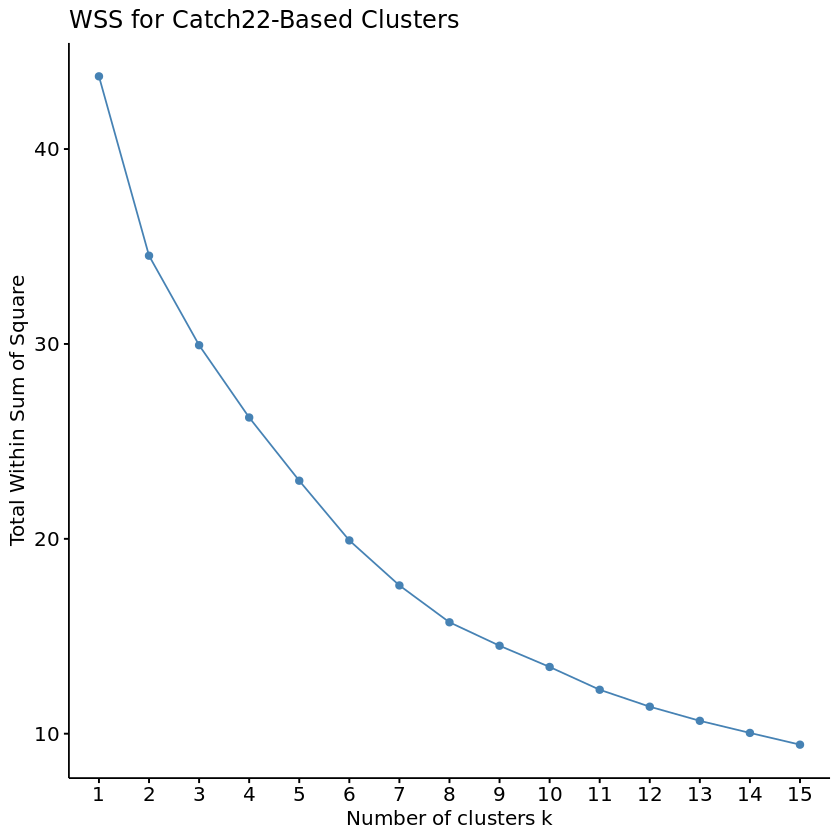

In [190]:
# Eblow Method based on WSS
set.seed(54321)
wss_catch22 <- fviz_nbclust(train_catch22_feat_df_scaled, 
             kmeans, 
             method = "wss", 
             k.max=15, 
             iter.max=1000, 
             nstart=100, 
             algorithm="Hartigan-Wong") + 
labs(title="WSS for Catch22-Based Clusters")

wss_catch22 # No clear best number, maybe 2?

In [191]:
ggsave("Results/Clustering/KMeans/wss_catch22.png", wss_catch22, width=10, height=5)

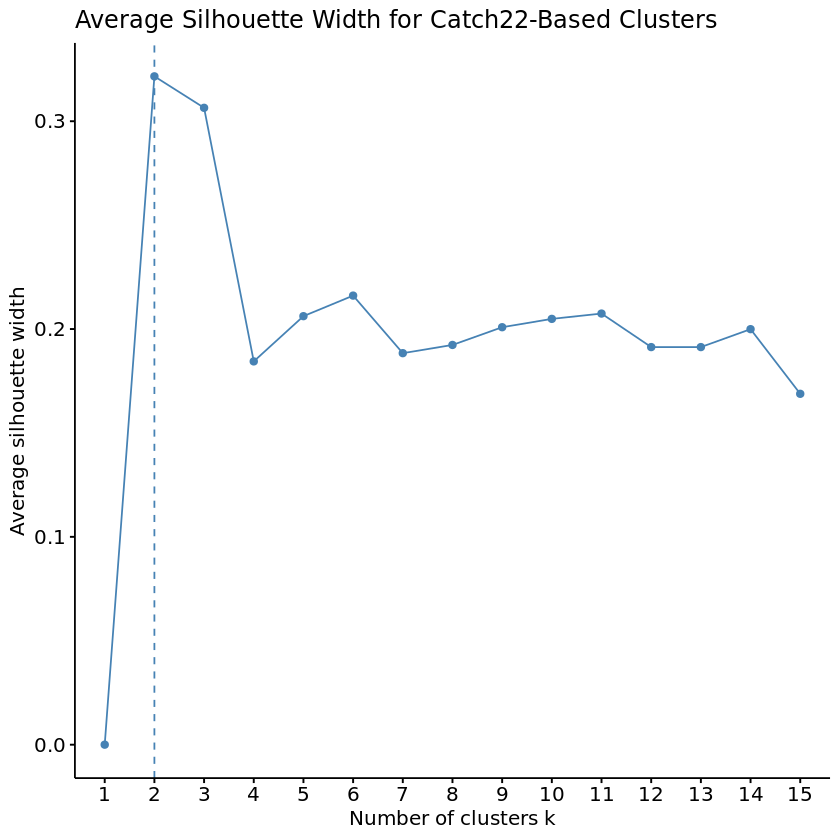

In [192]:
# Let's try the silhouette method instead
set.seed(54321)
sil_catch22 <- fviz_nbclust(train_catch22_feat_df_scaled, 
             kmeans, 
             method="silhouette", 
             k.max=15, 
             iter.max=10000, 
             nstart=500, 
             algorithm="Hartigan-Wong", 
            ) + 
labs(title="Average Silhouette Width for Catch22-Based Clusters")

sil_catch22 # Much clearer indication of 2 being the best, with 3 also looking reasonable

In [193]:
ggsave("Results/Clustering/KMeans/sil_catch22.png", sil_catch22, width=10, height=5)

In [194]:
# Let's examine the sillouhettes for K=2 and K=3 more closely. First, we create both sets of clusters
k1 <- 2
k2 <- 3

set.seed(54321)
kmeans_clust1 <- kmeans(train_catch22_feat_df_scaled, k1, iter.max=10000, nstart=500, algorithm="Hartigan-Wong") 
set.seed(54321)
kmeans_clust2 <- kmeans(train_catch22_feat_df_scaled, k2, iter.max=10000, nstart=500, algorithm="Hartigan-Wong") 

In [195]:
# Next, we compute the distance or dissimilarity matrix of the Catch22 features, to be used for visualizaing the 
# cluster silouhettes to make a final choice on the number of clusters
D <- dist(train_catch22_feat_df_scaled) # daisy(train_catch22_feat_df_scaled)

In [196]:
sil_catch22_k1 <- silhouette(kmeans_clust1$cluster, D) 

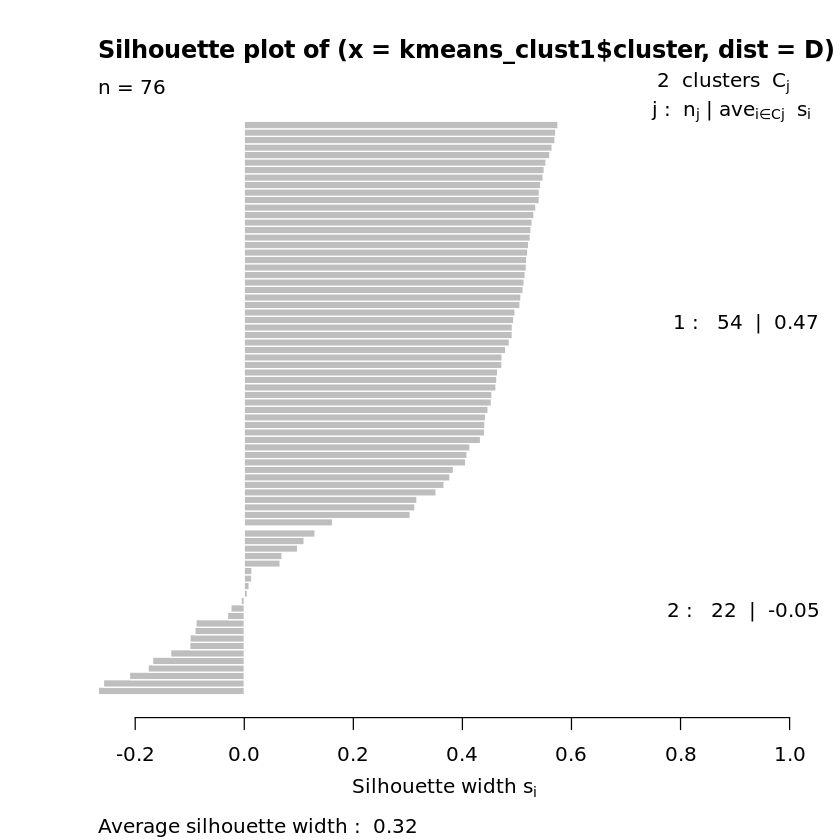

In [208]:
plot(sil_catch22_k1)

In [197]:
sil_catch22_k1_plot <- fviz_silhouette(sil_catch22_k1) + 
    ggtitle("Silhouette Width for Catch22-Based Clusters with K=2")
sil_catch22_k1_plot$layers[[2]]$aes_params$colour <- "black"

  cluster size ave.sil.width
1       1   54          0.47
2       2   22         -0.05


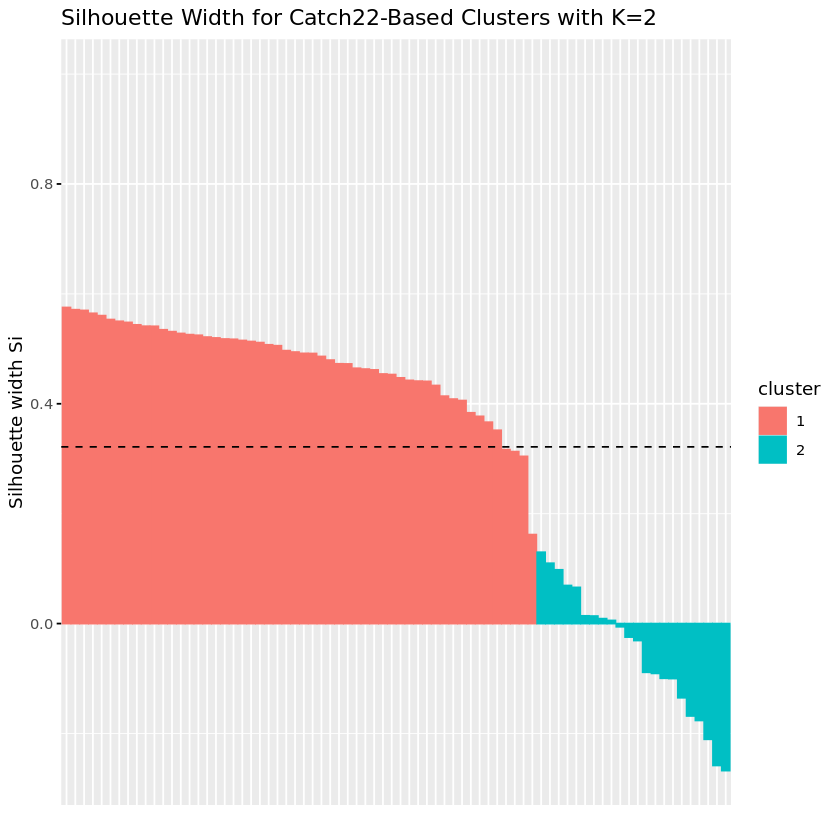

In [198]:
sil_catch22_k1_plot

In [205]:
ggsave("Results/Clustering/KMeans/avg_sil_catch22_k2.png", sil_catch22_k1_plot, width=10, height=5)

In [201]:
sil_catch22_k2 <- silhouette(kmeans_clust2$cluster, D)

sil_catch22_k2_plot <- fviz_silhouette(sil_catch22_k2) + 
    ggtitle("Silhouette Width for Catch22-Based Clusters with K=3")
sil_catch22_k2_plot$layers[[2]]$aes_params$colour <- "black"

  cluster size ave.sil.width
1       1   52          0.43
2       2    9          0.08
3       3   15          0.02


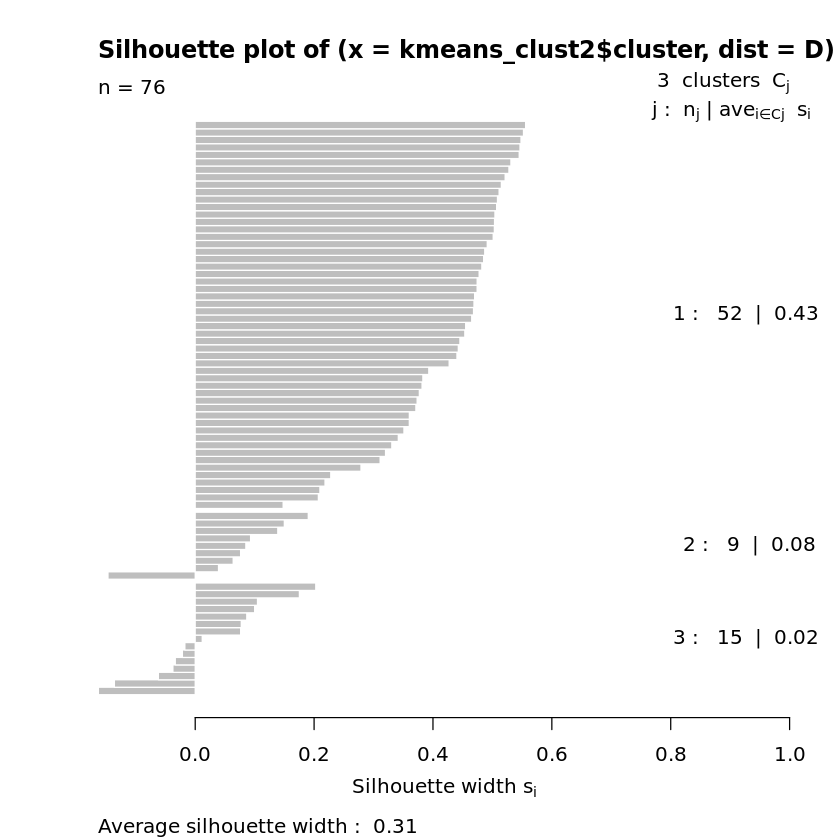

In [209]:
plot(sil_catch22_k2)

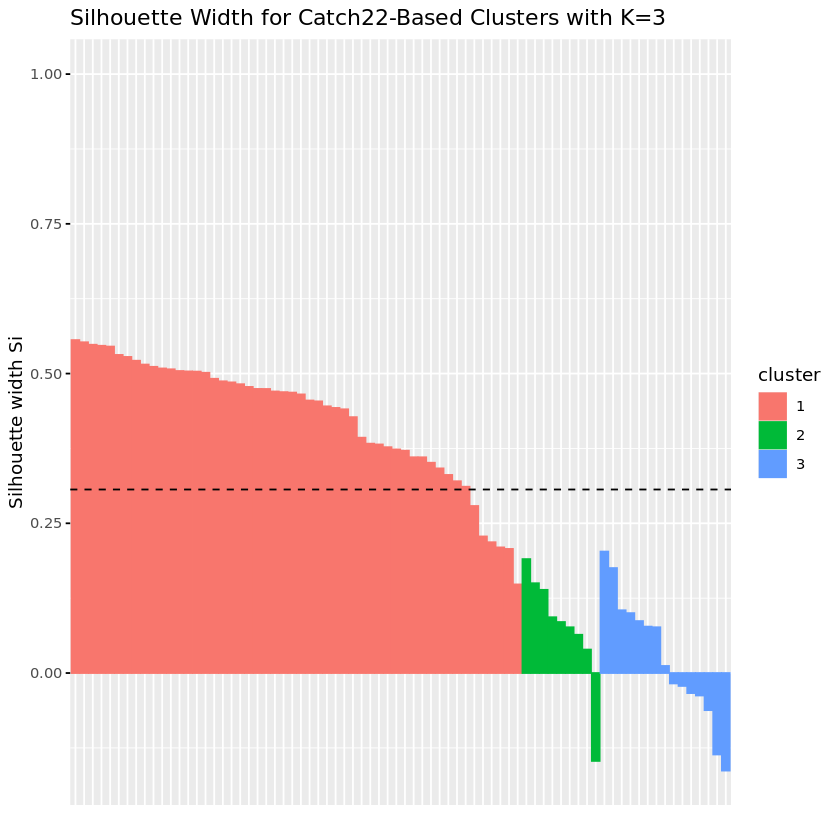

In [202]:
sil_catch22_k2_plot

In [206]:
ggsave("Results/Clustering/KMeans/avg_sil_catch22_k3.png", sil_catch22_k2_plot, width=10, height=5)

Even though 2 has a slightly higher average width, I don't like any clusters having negative width if it can be helped. As such, we will proceed with 3

In [40]:
# Create the final clusters with k=3

# Set seed
set.seed(54321)

# Set K
kfinal <- 3

# Create the clusters
kmeans_final <- kmeans(train_catch22_feat_df_scaled, kfinal, 
                       iter.max=10000, nstart=500, algorithm="Hartigan-Wong") 

In [41]:
# Save the cluster results in an RData file for future use
saveRDS(kmeans_final, 
        file="Results/Clustering/KMeans/kmeans_catch22.RData")

In [42]:
# Sanity check the clusters
kmeans_final$cluster

[1] 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1
[39] 3 1 1 3 2 1 3 3 1 1 3 3 3 1 3 3 3 3 1 1 1 1 1 3 3 1 1 3 3 2 2 1 1 1 1 1 1 1

In [43]:
# Re-format cluster assignments into a data frame with a ts_index field for joining later
kmeans_clust_df <- data.frame(ts_index=1:length(kmeans_final$cluster), 
                              kmeans_catch22_clust_assign=kmeans_final$cluster)

In [44]:
head(kmeans_clust_df)

,ts_index,kmeans_catch22_clust_assign
,<int>,<int>
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1


In [45]:
# Save that df to a csv file
write.csv(kmeans_clust_df, 
          "Results/Clustering/KMeans/kmeans_catch22_clustering_assign.csv", 
          row.names=FALSE)

# TSFeatures Computation  
Next, we will compute features using the tsfeatures function

In [219]:
# Compute basic set of tsfeatures - 
# Set scale to FALSE as to not scale the time series before computing the features
ts_feat_list <- tsfeatures(train_samples_ts, scale=FALSE)

In [220]:
# Sanity check and inspect the summary
head(ts_feat_list)

frequency,nperiods,seasonal_period1,seasonal_period2,trend,spike,linearity,curvature,e_acf1,e_acf10,⋯,trough1,trough2,entropy,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
672,2,96,672,0.11873802,0.06236472,94.46680,293.78410,0.3946537,0.6452961,⋯,11,609,0.6782436,0.9786684,6.071303,0.09955463,0.22923628,-0.6079489,0.3943768,0.8540087
672,2,96,672,0.06271599,0.04976898,47.65461,156.29639,0.4293463,0.3973220,⋯,5,500,0.6536231,0.9701665,6.374971,-0.09903519,0.07000481,-0.6268296,0.4218419,0.8425866
672,2,96,672,0.03671964,0.15966406,-131.59435,59.98838,0.6731399,1.8163552,⋯,28,282,0.6275385,0.9787455,7.026316,-0.05976278,0.09157036,-0.6038060,0.3817030,0.8231161
672,2,96,672,0.08678362,3.59837926,-665.51716,-40.91422,0.4426123,0.4621727,⋯,56,173,0.6499062,0.9801411,6.558471,0.04096415,0.16818353,-0.6292484,0.4389144,0.8525582
672,2,96,672,0.18428037,0.21968109,-432.29089,420.92339,0.4280693,0.5778573,⋯,31,435,0.5140402,0.9878141,7.655158,0.01152159,0.24774998,-0.6334273,0.4354897,0.8565159
672,2,96,672,0.18287555,0.79600912,-630.66720,52.72775,0.5222042,0.7548893,⋯,64,88,0.5680445,0.9834137,7.483912,-0.06527288,0.13048659,-0.6088053,0.3851671,0.8532984


In [221]:
summary(ts_feat_list)

   frequency      nperiods seasonal_period1 seasonal_period2     trend        
 Min.   :672   Min.   :2   Min.   :96       Min.   :672      Min.   :0.01055  
 1st Qu.:672   1st Qu.:2   1st Qu.:96       1st Qu.:672      1st Qu.:0.05470  
 Median :672   Median :2   Median :96       Median :672      Median :0.11456  
 Mean   :672   Mean   :2   Mean   :96       Mean   :672      Mean   :0.14953  
 3rd Qu.:672   3rd Qu.:2   3rd Qu.:96       3rd Qu.:672      3rd Qu.:0.18323  
 Max.   :672   Max.   :2   Max.   :96       Max.   :672      Max.   :0.78452  
     spike            linearity           curvature             e_acf1      
 Min.   : 0.00007   Min.   :-1528.544   Min.   :-1433.660   Min.   :0.1373  
 1st Qu.: 0.03781   1st Qu.: -210.866   1st Qu.: -163.041   1st Qu.:0.4283  
 Median : 0.17716   Median :   48.587   Median :   -1.206   Median :0.5735  
 Mean   : 3.55332   Mean   :    1.563   Mean   :   -1.467   Mean   :0.5463  
 3rd Qu.: 1.41586   3rd Qu.:  248.994   3rd Qu.:  141.446   3r

In [222]:
# Check for features where the lower and upper quantiles and median are identical - these likely do not provide
# enough useful information to include them for clustering
rownames(data.frame(t(sapply(ts_feat_list, function(i) quantile(i, c(0.25, 0.5, 0.75))))) %>%
    mutate(is_lower_equal_med = ifelse(X25.==X50., TRUE, FALSE)) %>%
    mutate(is_upper_equal_med = ifelse(X50.==X75., TRUE, FALSE)) %>%
    mutate(all_same = is_lower_equal_med+is_upper_equal_med) %>%
    filter(all_same==2))

[1] "frequency"        "nperiods"         "seasonal_period1" "seasonal_period2"

In [223]:
# Remove features with very low variation
ts_feat_list <- ts_feat_list%>% select(-c(frequency, nperiods, seasonal_period1, seasonal_period2))

In [224]:
# Scale features to unit interval to be consistent with how we used Catch22 features
ts_feat_list_df_scaled <- ts_feat_list

# Scale by looping through each feature and subtracting the min and dividing by the range
for (n in 1:ncol(ts_feat_list_df_scaled)){
    min_n <- min(ts_feat_list_df_scaled[,n])
    max_n <- max(ts_feat_list_df_scaled[,n])
    ts_feat_list_df_scaled[,n] <- (ts_feat_list_df_scaled[,n] - min_n)/(max_n - min_n)
}

## K-Means Clustering with TS Features

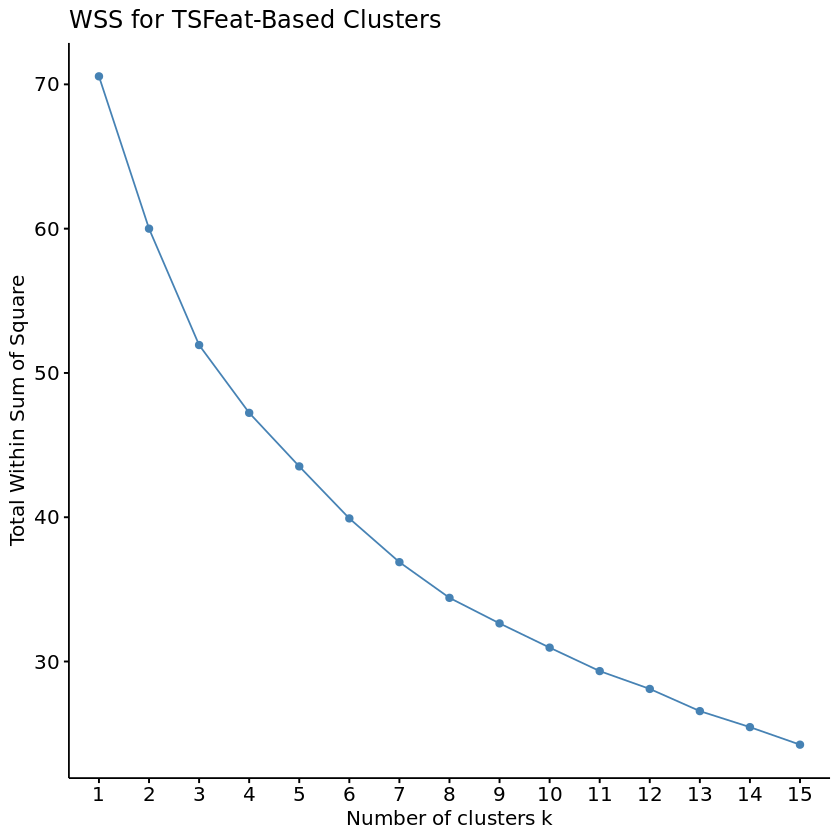

In [225]:
# Cluster using the Eblow Method based on WSS
set.seed(54321)
wss_tsfeat <- fviz_nbclust(ts_feat_list_df_scaled, 
             kmeans, 
             method = "wss", 
             k.max=15, 
             iter.max=1000, 
             nstart=100, 
             algorithm="Hartigan-Wong") + 
labs(title="WSS for TSFeat-Based Clusters")

wss_tsfeat
# No clear best number

In [226]:
ggsave("Results/Clustering/KMeans/wss_tsfeat.png", wss_tsfeat, width=10, height=5)

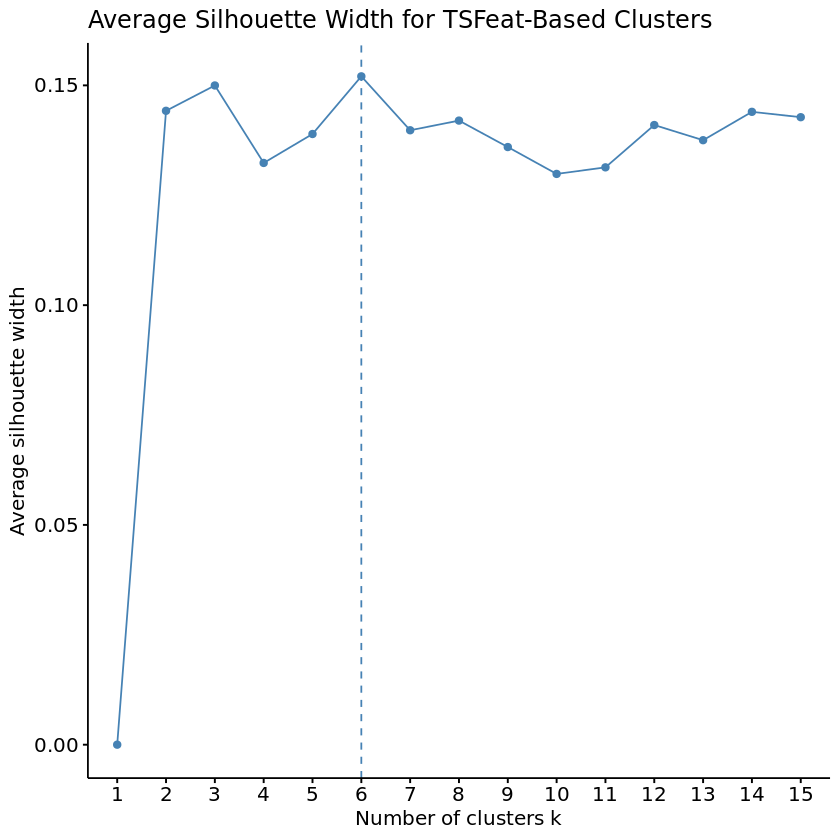

In [227]:
# Let's try the silhouette method instead
set.seed(54321)
sil_tsfeat <- fviz_nbclust(ts_feat_list_df_scaled,  
             kmeans, 
             method="silhouette", 
             k.max=15, 
             iter.max=10000, 
             nstart=500, 
             algorithm="Hartigan-Wong") + 
labs(title="Average Silhouette Width for TSFeat-Based Clusters")

sil_tsfeat
# Much clearer indication of 6 being optimal, with 3 another potential option

In [228]:
ggsave("Results/Clustering/KMeans/sil_tsfeat.png", sil_tsfeat, width=10, height=5)

In [229]:
# Inspect further results for 3 best looking options
# Choose the K's
k1 <- 2
k2 <- 3
k3 <- 6

# Create the clusters
set.seed(54321)
kmeans_clust1 <- kmeans(ts_feat_list_df_scaled, 
                        k1, iter.max=10000, nstart=500, algorithm="Hartigan-Wong") 
set.seed(54321)
kmeans_clust2 <- kmeans(ts_feat_list_df_scaled, 
                        k2, iter.max=10000, nstart=500, algorithm="Hartigan-Wong") 

set.seed(54321)
kmeans_clust3 <- kmeans(ts_feat_list_df_scaled, 
                        k3, iter.max=10000, nstart=500, algorithm="Hartigan-Wong") 

In [230]:
# Compute distance matrix
D <- dist(ts_feat_list_df_scaled) # daisy(ts_feat_list_df_scaled)

In [231]:
sil_tsfeat_k1 <- silhouette(kmeans_clust1$cluster, D) 

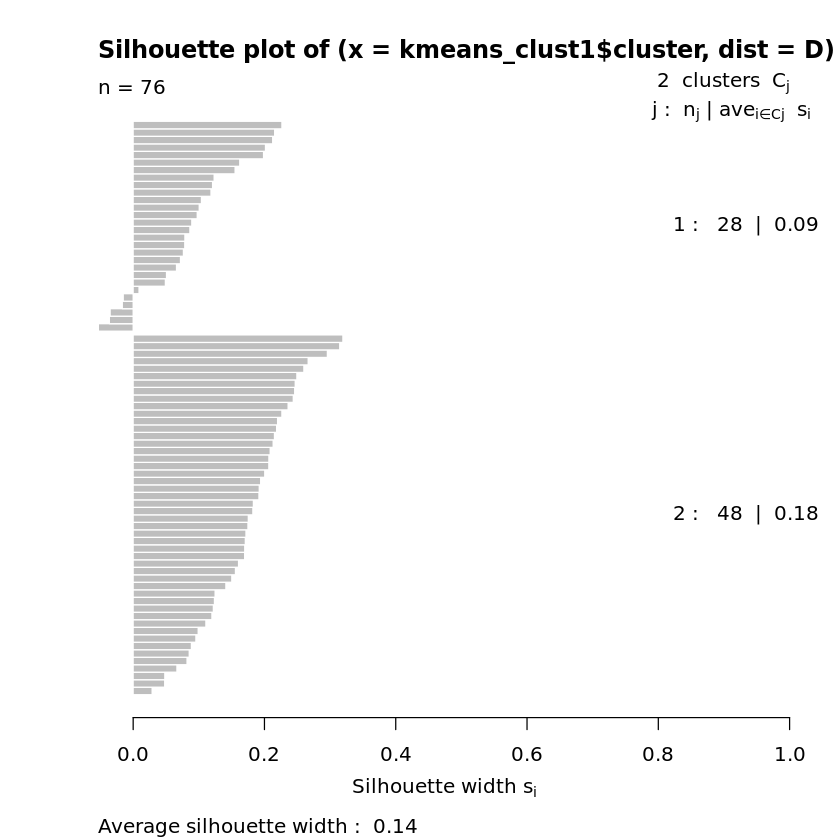

In [232]:
plot(sil_tsfeat_k1)

  cluster size ave.sil.width
1       1   28          0.09
2       2   48          0.18


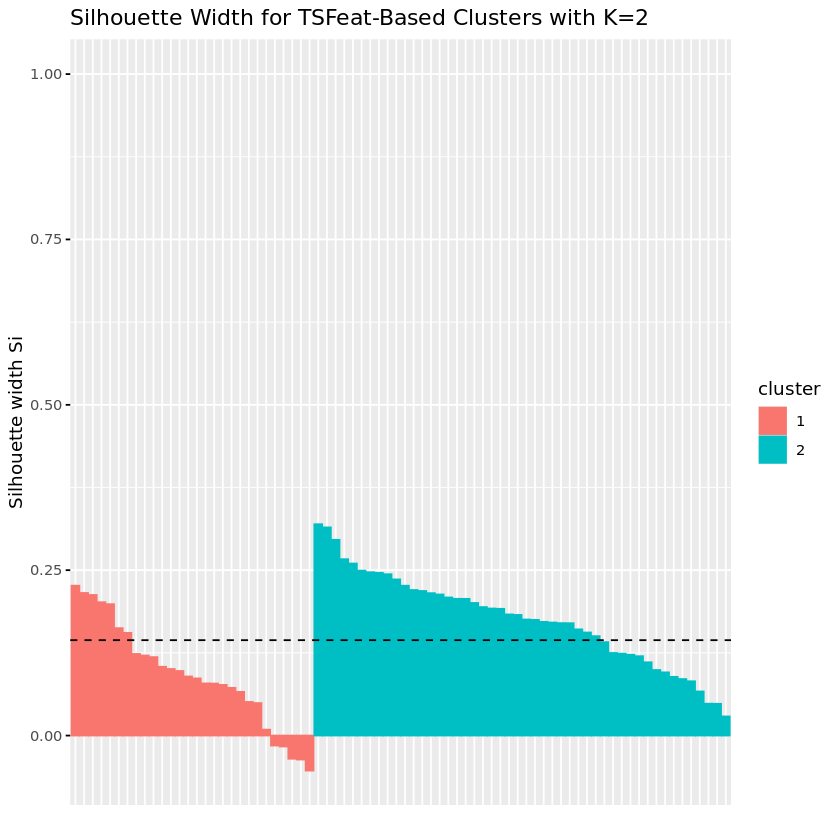

In [234]:
sil_tsfeat_k1_plot <- fviz_silhouette(sil_tsfeat_k1) + 
    ggtitle("Silhouette Width for TSFeat-Based Clusters with K=2")
sil_tsfeat_k1_plot$layers[[2]]$aes_params$colour <- "black"

sil_tsfeat_k1_plot

In [236]:
ggsave("Results/Clustering/KMeans/avg_sil_tsfeat_k2.png", sil_tsfeat_k1_plot, width=10, height=5)

In [237]:
sil_tsfeat_k2 <- silhouette(kmeans_clust2$cluster, D) 

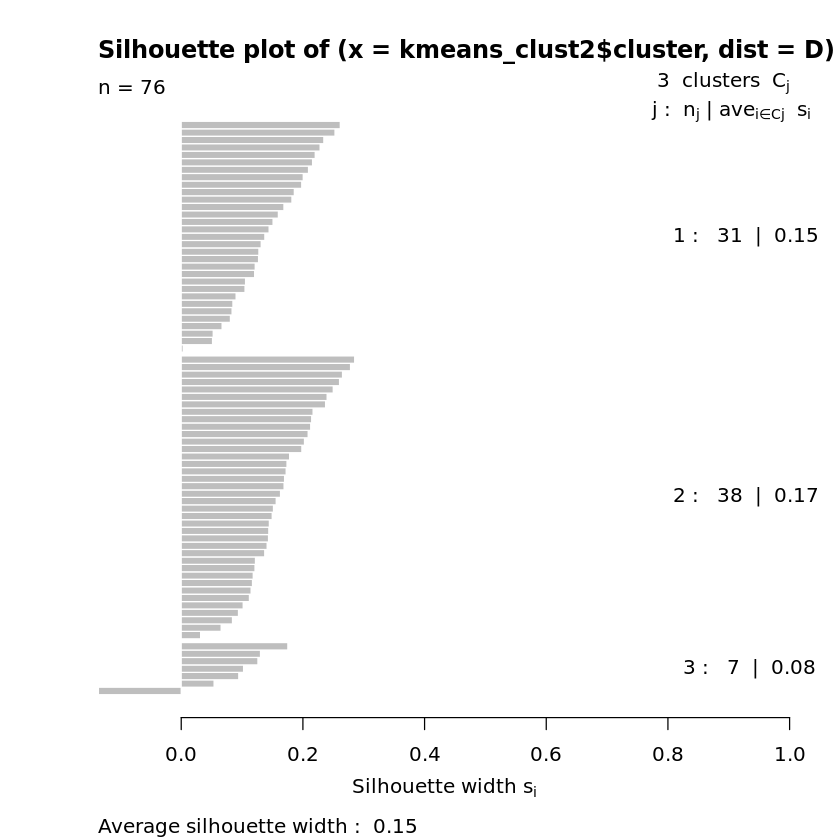

In [238]:
plot(sil_tsfeat_k2)

  cluster size ave.sil.width
1       1   31          0.15
2       2   38          0.17
3       3    7          0.08


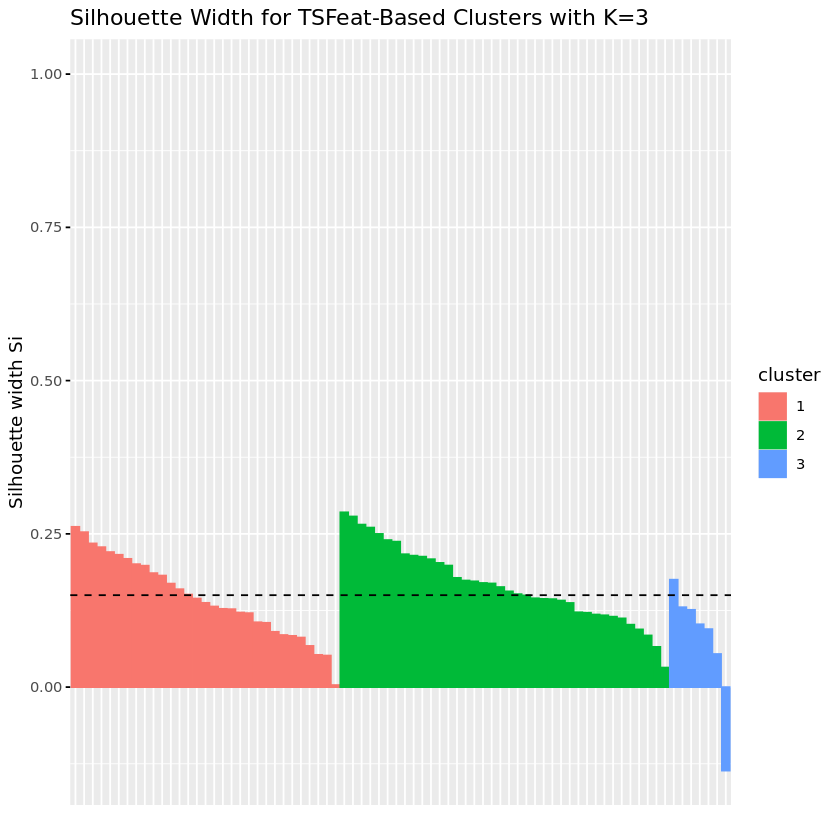

In [239]:
sil_tsfeat_k2_plot <- fviz_silhouette(sil_tsfeat_k2) + 
    ggtitle("Silhouette Width for TSFeat-Based Clusters with K=3")
sil_tsfeat_k2_plot$layers[[2]]$aes_params$colour <- "black"

sil_tsfeat_k2_plot

In [240]:
ggsave("Results/Clustering/KMeans/avg_sil_tsfeat_k3.png", sil_tsfeat_k2_plot, width=10, height=5)

In [241]:
sil_tsfeat_k3 <- silhouette(kmeans_clust3$cluster, D) 

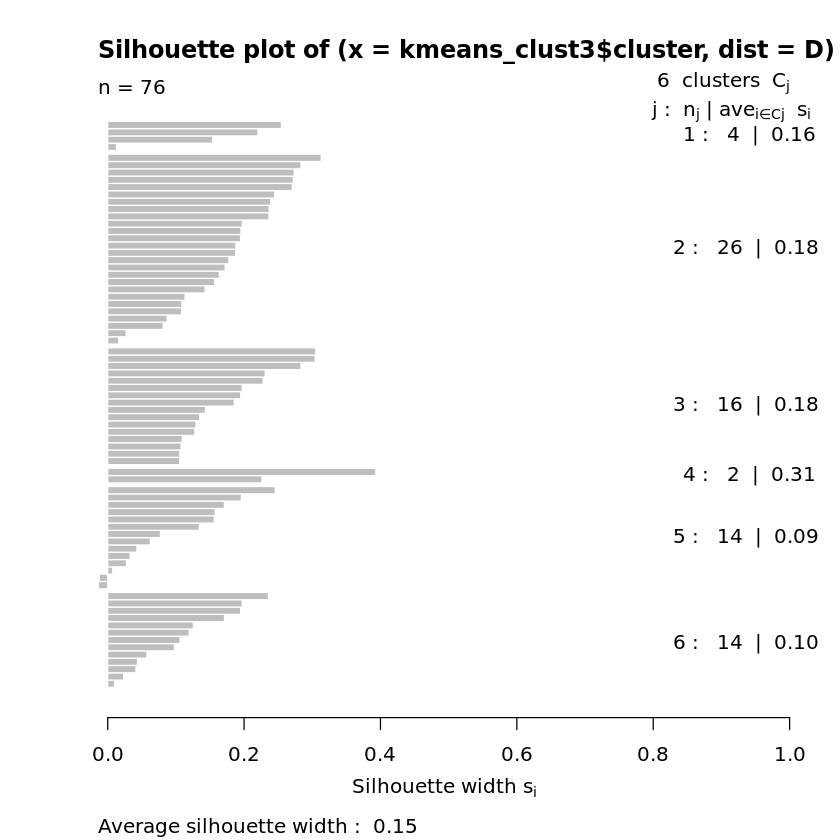

In [242]:
plot(sil_tsfeat_k3)

  cluster size ave.sil.width
1       1    4          0.16
2       2   26          0.18
3       3   16          0.18
4       4    2          0.31
5       5   14          0.09
6       6   14          0.10


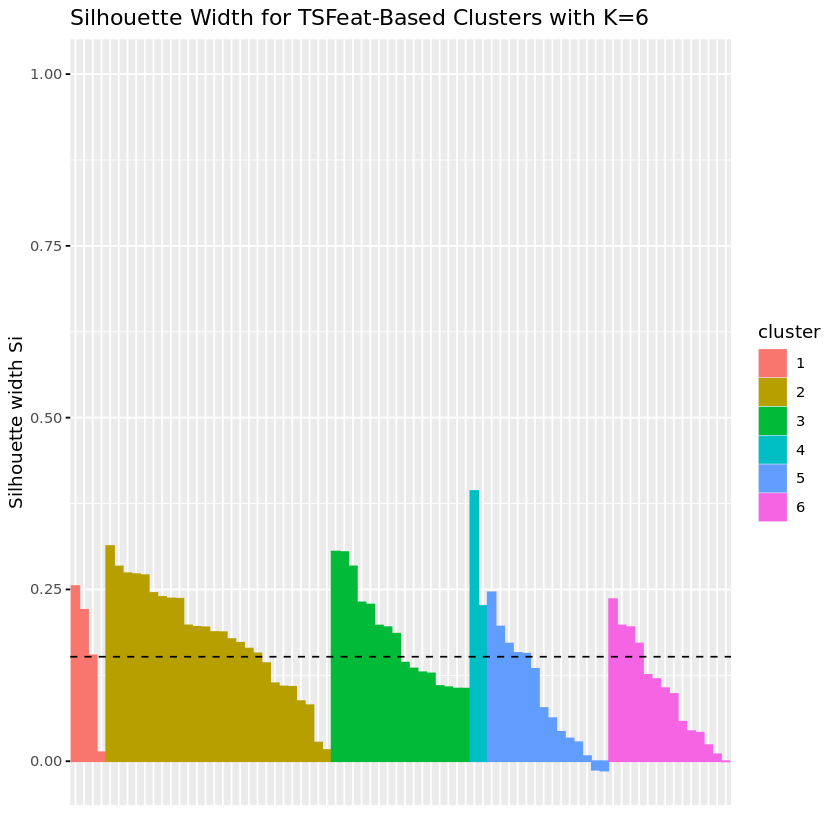

In [243]:
sil_tsfeat_k3_plot <- fviz_silhouette(sil_tsfeat_k3) + 
    ggtitle("Silhouette Width for TSFeat-Based Clusters with K=6")
sil_tsfeat_k3_plot$layers[[2]]$aes_params$colour <- "black"

sil_tsfeat_k3_plot

In [244]:
ggsave("Results/Clustering/KMeans/avg_sil_tsfeat_k6.png", sil_tsfeat_k3_plot, width=10, height=5)

In [61]:
# We choose k=3 even though the width is slightly better for 6 as 3 is much simpler and several clusters with K=6
# are just very small (too small to be practical)
set.seed(54321)
kfinal <- 3
kmeans_final <- kmeans(ts_feat_list_df_scaled,
                       kfinal, iter.max=10000, nstart=500, algorithm="Hartigan-Wong") 

In [62]:
# Save the results in an RData file
saveRDS(kmeans_final, 
        file="Results/Clustering/KMeans/kmeans_tsfeat.RData")

In [85]:
# Print cluster assignments
kmeans_final$cluster

[1] 1 1 1 1 1 2 2 1 2 2 2 2 1 1 1 1 1 2 1 1 2 1 1 2 2 2 1 1 1 2 2 2 2 1 2 2 1 2
[39] 2 2 2 2 2 2 3 2 2 2 1 2 3 3 3 1 2 2 1 1 2 2 1 3 3 1 2 3 2 1 2 1 1 1 1 2 2 2

In [86]:
# Format cluster assignments into a df
kmeans_clust_df <- data.frame(ts_index=1:length(kmeans_final$cluster), 
                              kmeans_tsfeat_clust_assign=kmeans_final$cluster)

In [87]:
head(kmeans_clust_df)

,ts_index,kmeans_tsfeat_clust_assign
,<int>,<int>
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,2


In [88]:
# Save the df to a csv file for future use
write.csv(kmeans_clust_df, 
          "Results/Clustering/KMeans/kmeans_tsfeat_clustering_assign.csv", 
          row.names=FALSE)

# K-Medoids Clustering on Raw Time Series

In [245]:
# Create pam (medoids) clusters using the dtw distance metric between the raw time series rather than computing
# features first. We try K=2:12 to find an optimal value
dtw_clusters <- tsclust(train_samples_ts, 
                        k=2:12, 
                        type="partitional", 
                        distance = "dtw_basic", 
                        centroid = "pam",
                        seed=54321,
                        trace=TRUE
                       )


	Precomputing distance matrix...



Repetition 1 for k = 2



Iteration 1: Changes / Distsum = 76 / 50165888
Iteration 2: Changes / Distsum = 13 / 28649136
Iteration 3: Changes / Distsum = 5 / 27246448
Iteration 4: Changes / Distsum = 6 / 26470328
Iteration 5: Changes / Distsum = 11 / 25018251
Iteration 6: Changes / Distsum = 5 / 21254810
Iteration 7: Changes / Distsum = 0 / 21254810



Repetition 1 for k = 3



Iteration 1: Changes / Distsum = 76 / 23250550
Iteration 2: Changes / Distsum = 5 / 18803600
Iteration 3: Changes / Distsum = 0 / 18803600



Repetition 1 for k = 4



Iteration 1: Changes / Distsum = 76 / 26811032
Iteration 2: Changes / Distsum = 20 / 17464293
Iteration 3: Changes / Distsum = 3 / 16770916
Iteration 4: Changes / Distsum = 2 / 16745902
Iteration 5: Changes / Distsum = 1 / 16728500
Iteration 6: Changes / Distsum = 0 / 16728500



Repetition 1 for k = 5



Iteration 1: Changes / Distsum = 76 / 25647411
Iteration 2: Changes / Distsum = 10 / 16531080
Iteration 3: Changes / Distsum = 1 / 16398648
Iteration 4: Changes / Distsum = 0 / 16398648



Repetition 1 for k = 6



Iteration 1: Changes / Distsum = 76 / 19713756
Iteration 2: Changes / Distsum = 9 / 17175426
Iteration 3: Changes / Distsum = 15 / 14968766
Iteration 4: Changes / Distsum = 7 / 14225910
Iteration 5: Changes / Distsum = 3 / 14071036
Iteration 6: Changes / Distsum = 0 / 14063040



Repetition 1 for k = 7



Iteration 1: Changes / Distsum = 76 / 18495500
Iteration 2: Changes / Distsum = 4 / 15454396
Iteration 3: Changes / Distsum = 3 / 15293227
Iteration 4: Changes / Distsum = 0 / 15285232



Repetition 1 for k = 8



Iteration 1: Changes / Distsum = 76 / 18826626
Iteration 2: Changes / Distsum = 17 / 15138691
Iteration 3: Changes / Distsum = 8 / 14866632
Iteration 4: Changes / Distsum = 7 / 13665594
Iteration 5: Changes / Distsum = 3 / 13480624
Iteration 6: Changes / Distsum = 1 / 13463222
Iteration 7: Changes / Distsum = 0 / 13463222



Repetition 1 for k = 9



Iteration 1: Changes / Distsum = 76 / 16228758
Iteration 2: Changes / Distsum = 7 / 15023328
Iteration 3: Changes / Distsum = 3 / 14908188
Iteration 4: Changes / Distsum = 0 / 14904427



Repetition 1 for k = 10



Iteration 1: Changes / Distsum = 76 / 16407916
Iteration 2: Changes / Distsum = 9 / 13655431
Iteration 3: Changes / Distsum = 3 / 13405304
Iteration 4: Changes / Distsum = 5 / 13231460
Iteration 5: Changes / Distsum = 3 / 13099606
Iteration 6: Changes / Distsum = 2 / 13074592
Iteration 7: Changes / Distsum = 1 / 13057190
Iteration 8: Changes / Distsum = 0 / 13057190



Repetition 1 for k = 11



Iteration 1: Changes / Distsum = 76 / 24343044
Iteration 2: Changes / Distsum = 15 / 16027480
Iteration 3: Changes / Distsum = 5 / 15159280
Iteration 4: Changes / Distsum = 4 / 15062327
Iteration 5: Changes / Distsum = 2 / 14924854
Iteration 6: Changes / Distsum = 0 / 14924854



Repetition 1 for k = 12



Iteration 1: Changes / Distsum = 76 / 13055416
Iteration 2: Changes / Distsum = 6 / 12268712
Iteration 3: Changes / Distsum = 0 / 12268712

	Elapsed time is 138.311 seconds.



In [246]:
# Create a list of cluster quality for each K
dtw_cluster_quality <- lapply(dtw_clusters, cvi)

In [247]:
# Turn that list into a df
dtw_cluster_quality_df <- data.frame(do.call("rbind", dtw_cluster_quality))

In [248]:
dtw_cluster_quality_df

Sil,SF,CH,DB,DBstar,D,COP
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.66299893,0,95.42205,0.6039821,0.6039821,0.07647686,0.19125251
0.37515449,0,56.24669,0.9308905,1.2862025,0.11771508,0.12822965
0.37473669,0,42.98607,1.0896729,2.2428614,0.05554870,0.11779599
0.24699064,0,33.28491,1.4745898,2.6645976,0.07437776,0.10499308
0.30607597,0,34.34424,1.0951365,2.1026697,0.09848232,0.08743999
0.29530648,0,22.84475,1.0225772,2.1938737,0.05554870,0.09703535
0.28152895,0,24.81591,0.9819535,2.1043271,0.09848232,0.07815299
0.18197460,0,17.88953,1.2165093,2.6006124,0.04625241,0.09367202
0.21455359,0,19.23017,1.0069293,2.0003973,0.09644064,0.07661978


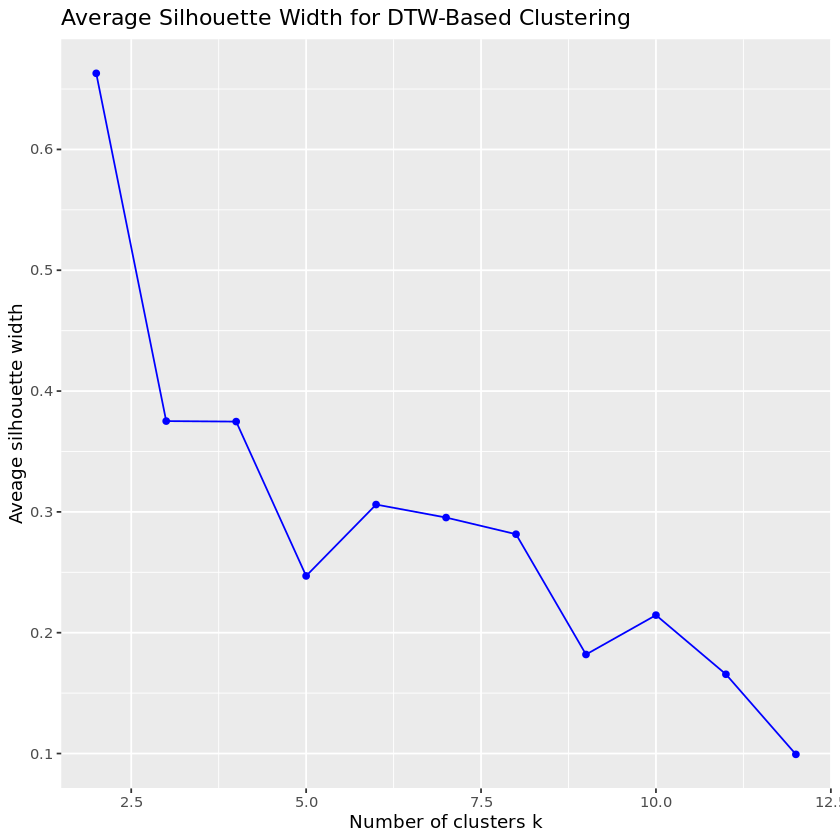

In [251]:
# Plot cluster quality to pick a K
dtw_clust_qual <- ggplot() + 
    geom_point(aes(x=2:12, y=dtw_cluster_quality_df$Sil), col='blue') + 
    geom_line(aes(x=2:12, y=dtw_cluster_quality_df$Sil), col='blue') +
    xlab("Number of clusters k") + 
    ylab("Aveage silhouette width") + 
    ggtitle("Average Silhouette Width for DTW-Based Clustering")
dtw_clust_qual

In [253]:
ggsave("Results/Clustering/DTW/dtw_clust_qual.png", dtw_clust_qual, width=10, height=5)

In [71]:
# Based on the above, we choose K=2 as our final K
# Create the final clusters with K=2
final_dtw_clust <- tsclust(train_samples_ts,
                           k=2, 
                           type="partitional", 
                           distance = "dtw_basic", 
                           centroid = "pam",
                           seed=54321,
                           trace=TRUE
                       )


	Precomputing distance matrix...

Iteration 1: Changes / Distsum = 76 / 50165888
Iteration 2: Changes / Distsum = 13 / 28649136
Iteration 3: Changes / Distsum = 5 / 27246448
Iteration 4: Changes / Distsum = 6 / 26470328
Iteration 5: Changes / Distsum = 11 / 25018251
Iteration 6: Changes / Distsum = 5 / 21254810
Iteration 7: Changes / Distsum = 0 / 21254810

	Elapsed time is 135.383 seconds.



In [72]:
# Inspect cluster results
final_dtw_clust

partitional clustering with 2 clusters
Using dtw_basic distance
Using pam centroids

Time required for analysis:
    user   system  elapsed 
2129.618    0.251  135.383 

Cluster sizes with average intra-cluster distance:

  size  av_dist
1   25 444242.1
2   51 198995.3

In [83]:
# Save results in RData files
saveRDS(final_dtw_clust, file="Results/Clustering/DTW/dtw_clust.RData")

In [79]:
# Extract the clusters assignments
dtw_clust_assign <- final_dtw_clust@cluster

In [80]:
# Save the assignments into a df
dtw_clust_df <- data.frame(ts_index=1:length(dtw_clust_assign), 
                           dtw_clust_assign=dtw_clust_assign
                          )

In [81]:
head(dtw_clust_df)

,ts_index,dtw_clust_assign
,<int>,<int>
1,1,2
2,2,2
3,3,2
4,4,1
5,5,1
6,6,1


In [84]:
# Save that df to a csv file
write.csv(dtw_clust_df, "Results/Clustering/DTW/dtw_clustering_assign.csv", row.names=FALSE)